In [4]:
import qutip as q
import matplotlib.pyplot as plt
import numpy as np 
from scipy.linalg import expm

#Creamos cada espacio
#Tamaño espacio de Fock para estado de luz
N = 50
#Constantes del sistema
w0 = 1.5
w = 1.3
lamda = 1
#Creamos los operadores para el hamiltoniano
sig_atomo = q.tensor(q.destroy(2),q.identity(N)) #producto tensorial entre sigma 2 y la identidad N
a_campo = q.tensor(q.identity(2),q.destroy(N)) #producto tensorial entre la identidad 2 y operador destruccion N
sig_z = q.tensor(q.sigmaz(),q.identity(N)) #producto tensorial entre sigma z y la identidad N

#Creamos el hamiltoniano para la evolución temporal
H_int = 0.5 * w0 * sig_z + w*a_campo.dag()*a_campo + lamda*(sig_atomo.dag()*a_campo + sig_atomo*a_campo.dag())



In [7]:
e_if = q.basis(N,10)  #estado de fock con 10 fotones 
#estado basal de 2 niveles
#ground state
g_atomo = q.basis(2,0)
#excited state
e_atomo = q.basis(2,1)
#Estado inicial es el producto tensorial
estado_e = q.tensor(e_atomo,e_if)
estado_g = q.tensor(g_atomo,e_if)
#Calculamos la probabilidad atómica para ambos niveles de energía según el tiempo
#definimos el tiempo
tiempo = np.linspace(0,10*lamda/w,500)
#Dado el estado inicial estado_g, la evolución se calcula usando mesolve
estado_final = q.mesolve(H_int,estado_g,tiempo)
evolucion_temporal_estado = estado_final.states
tasa_inversion = q.expect(sig_z,evolucion_temporal_estado)

Text(0.5, 1.0, 'Tasa de inversión en el tiempo')

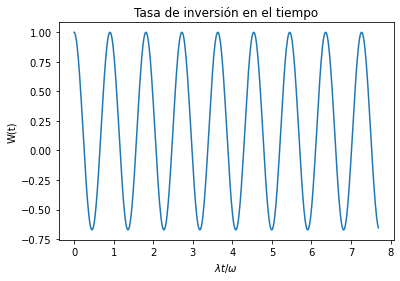

In [8]:
#Ploteamos la tasa de inversion en el tiempo
fig, ax = plt.subplots()
ax.plot(tiempo,tasa_inversion)
ax.set_xlabel(r'$\lambda t / \omega $')
ax.set_ylabel('W(t)')
ax.set_title('Tasa de inversión en el tiempo')


In [9]:

max_value = 0.0
xvec = np.linspace(-10,10,300)
# Parallelized Wigner computation

def compute_wigner(rho):
    return q.wigner(rho, xvec, xvec)
W_list = q.parfor(compute_wigner, evolucion_temporal_estado)

In [ ]:
import matplotlib.animation as ani
import matplotlib.colors as clr
import types

# Prepare figure
fname = "rabi_oscill_fock.gif"
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Plot steady state
ax[1].contourf(xvec, xvec, q.wigner(evolucion_temporal_estado, xvec, xvec), 100, norm=clr.Normalize(-0.25,0.25), cmap=plt.get_cmap("RdBu"))
ax[1].set_aspect("equal"); ax[1].set_title("Steady State", fontsize=14); ax[1].tick_params(labelsize=14)
ax[1].set_xlabel(r"$x$", fontsize=14); ax[1].set_ylabel(r"$p$", fontsize=14)

# Animate evolution
def animate(n):
    ax[0].cla(); ax[0].set_aspect("equal"); ax[0].tick_params(labelsize=14)
    ax[0].set_title("Time: %.2f"%(evolucion_temporal_estado.times[n]), fontsize=14);
    ax[0].set_xlabel(r"$x$", fontsize=14); ax[0].set_ylabel(r"$p$", fontsize=14)
    im = ax[0].contourf(xvec, xvec, W_list[n], 100, norm=clr.Normalize(-0.25,0.25), cmap=plt.get_cmap("RdBu"))
    def setvisible(self, vis): # Work-around for visibility bug in contourf
        for c in self.collections: c.set_visible(vis)
    im.set_visible = types.MethodType(setvisible, im)
anim = ani.FuncAnimation(fig, animate, frames=len(evolucion_temporal_estado.times))
anim.save(fname, writer="imagemagick", fps=20)
plt.close()

In [ ]:
import IPython.display as ipyd
ipyd.Image(url=fname)